## Henüz yetiştiremedim, hala çalışıyorum. 1 ve 2. sorular görece bitmiş olsa da 3. soruyu hala  çözebilmiş değilim.

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### Burada hangi regresyon modelinin en yüksek skoru verdiğini kontrol edebilmek adına bir fonksiyon yazdım. Bu sayede verilen data için en uygun regresyon modelini belirleyebiliyorum.

In [225]:
def getregressions(X,y):
    modelfishLinear = LinearRegression()
    modelfishLinear.fit(X,y)
    LinearRsqr = modelfishLinear.score(X,y)
    
    modelfishRidge = Ridge()
    modelfishRidge.fit(X,y)
    RidgeRsqr = modelfishRidge.score(X,y)
    
    modelfishLasso = Lasso()
    modelfishLasso.fit(X,y)
    LassoRsqr = modelfishLasso.score(X,y)
    
    modelfishElastic = ElasticNet()
    modelfishElastic.fit(X,y)
    ElasticRsqr = modelfishElastic.score(X,y)
    return LinearRsqr, RidgeRsqr, LassoRsqr, ElasticRsqr

## Question 1

In [57]:
from statsmodels.datasets import copper
prices = copper.data.load_pandas()
copper = prices['data']
copper

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


#### burada heatmap yardımı ile hangi değerlerin korelasyonlu oldugu bulundu
#### burada 3 ve 4 numaralı değişkenler diğer bütün parametler ile oldukça düşük korelasyonlu iken, diğerleri arasında oldukça yüksek ilişki mevcut
#### bu yüzden ols tablosundaki sıralamayı bu katsayılara bakarak ele alacağım. 

<AxesSubplot:>

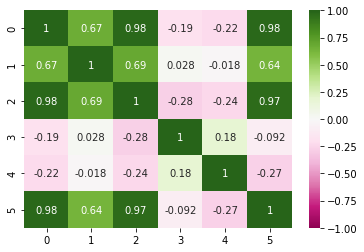

In [58]:
cor = np.corrcoef(copper.transpose())
sns.heatmap(cor,cmap='PiYG', annot=True, vmin=-1, vmax=1) 

#### en yüksek ilişkili olan zaman gibi gözüküyor.

In [59]:
X1 = copper.iloc[:,0:5]
y1 = copper.iloc[:,5:6]

modelcopper1 = ols("TIME ~  WORLDCONSUMPTION + INCOMEINDEX + COPPERPRICE + ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TIME   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     307.7
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.72e-17
Time:                        23:47:14   Log-Likelihood:                -29.785
No. Observations:                  25   AIC:                             71.57
Df Residuals:                      19   BIC:                             78.88
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.1656      7.443     -3.112      0.006     -38.744      -7.587
WORLDCONSUMPTION     0.0020      0.001      3.429      0.003       0.001       0.003
INCOMEINDEX         32.2185      7.488      4.303      0.000      16.547      47.890
COPPERPRICE         -0.1259      0.041     -3.080      0.006      -0.211      -0.040
ALUMPRICE            0.5748      0.097      5.950      0.000       0.373       0.777
INVENTORYINDEX     -12.0591      5.675     -2.125      0.047     -23.938      -0.181
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.271
Skew:                           0.255   Prob(JB):                        0.873
Kurtosis:                       2.983   Cond. No.                     3.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ancak diğerlerine de bakmak gerekiyor. 

In [71]:
modelcopper2 = ols(" WORLDCONSUMPTION ~  TIME + INCOMEINDEX + COPPERPRICE + ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.11e-15
Time:                        23:59:23   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        283.9552   2768.572      0.103      0.919   -5510.733    6078.644
TIME             187.2307     54.595      3.429      0.003      72.961     301.500
INCOMEINDEX     1442.8858   3168.592      0.455      0.654   -5189.054    8074.826
COPPERPRICE       15.0432     14.761      1.019      0.321     -15.852      45.938
ALUMPRICE        -64.1230     47.258     -1.357      0.191    -163.035      34.789
INVENTORYINDEX  2450.3845   1827.270      1.341      0.196   -1374.136    6274.905
==============================================================================
Omnibus:                        8.395   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.465
Skew:                          -0.959   Prob(JB):                       0.0395
Kurtosis:                       4.589   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
modelcopper3 = ols(" COPPERPRICE ~  TIME + WORLDCONSUMPTION + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            COPPERPRICE   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     9.278
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           0.000133
Time:                        23:59:51   Log-Likelihood:                -67.842
No. Observations:                  25   AIC:                             147.7
Df Residuals:                      19   BIC:                             155.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -97.4355     35.453     -2.748      0.013    -171.639     -23.232
TIME                -2.6442      0.859     -3.080      0.006      -4.441      -0.847
WORLDCONSUMPTION     0.0034      0.003      1.019      0.321      -0.004       0.011
INCOMEINDEX        132.8351     37.362      3.555      0.002      54.635     211.036
ALUMPRICE            2.0732      0.579      3.583      0.002       0.862       3.284
INVENTORYINDEX     -15.1081     28.725     -0.526      0.605     -75.230      45.013
==============================================================================
Omnibus:                        2.887   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.376
Skew:                           0.736   Prob(JB):                        0.305
Kurtosis:                       2.662   Cond. No.                     3.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
modelcopper4 = ols("INCOMEINDEX ~  TIME + WORLDCONSUMPTION +  COPPERPRICE+ ALUMPRICE + INVENTORYINDEX", data=copper).fit()
modelcopper4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCOMEINDEX   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     248.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.28e-16
Time:                        00:00:08   Log-Likelihood:                 65.855
No. Observations:                  25   AIC:                            -119.7
Df Residuals:                      19   BIC:                            -112.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6635      0.129      5.150      0.000       0.394       0.933
TIME                 0.0153      0.004      4.303      0.000       0.008       0.023
WORLDCONSUMPTION  7.482e-06   1.64e-05      0.455      0.654   -2.69e-05    4.19e-05
COPPERPRICE          0.0030      0.001      3.555      0.002       0.001       0.005
ALUMPRICE           -0.0121      0.002     -5.456      0.000      -0.017      -0.007
INVENTORYINDEX       0.1453      0.134      1.088      0.290      -0.134       0.425
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.001
Skew:                           0.250   Prob(JB):                        0.606
Kurtosis:                       2.156   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS tablolarından da görüldüğü üzere R^2 değeri en yüksek ve p-değeri en düşük olan ilişki model1 olarak karşımıza çıkıyor. Ancak model1'de zaman bağımlı değişken olduğu için, bunun çok bir anlamı olmayabilir. Bu durumda 3. model INCOMEINDEX bağlı değişkenli olan model, en uygun çıktıyı bize sunmakta.

In [86]:
anova_lm(modelcopper3)

,df,sum_sq,mean_sq,F,PR(>F)
TIME,1.0,463.355580,463.355580,26.432303,0.000058
WORLDCONSUMPTION,1.0,63.141053,63.141053,3.601906,0.073014
INCOMEINDEX,1.0,45.859698,45.859698,2.616085,0.122267
ALUMPRICE,1.0,236.013951,236.013951,13.463509,0.001630
INVENTORYINDEX,1.0,4.849386,4.849386,0.276635,0.605001
Residual,19.0,333.068067,17.529898,NaN,NaN


#### Burada ise açık bir şekilde modelimiz açıklayan en iyi regresyon modelinin lineer regresyon olduğu gözükmekte. 

In [61]:
getregressions(X1,y1)

(0.9877997611854856,
 0.9722374878223046,
 0.9661498206080497,
 0.9697557535038337)

## Question 2

In [226]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';', header = None, names = ["CIC0", "SM1_Dz", "GATS1i", "NdsCH", "NdssC", "MLOGP", "LC50"])
fish

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [63]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CIC0    908 non-null    float64
 1   SM1_Dz  908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


<AxesSubplot:>

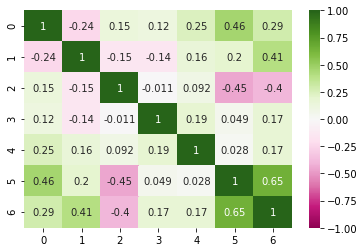

In [227]:
corfish = np.corrcoef(fish.transpose())
sns.heatmap(corfish,cmap='PiYG', annot=True, vmin=-1, vmax=1)

In [228]:
X2 = fish.iloc[:,0:6]
y2 = fish.iloc[:,6:7]
getregressions(X2, y2)

(0.5771635677620811, 0.577150787522513, 0.1944092781207699, 0.3218795769601678)

#### Bu model çok anlamsız.

In [235]:
modelfish = ols("LC50 ~  CIC0 + SM1_Dz + GATS1i + NdsCH + NdssC + MLOGP", data=fish).fit()
modelfish.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          1.33e-164
Time:                        03:28:56   Log-Likelihood:                -1238.0
No. Observations:                 908   AIC:                             2490.
Df Residuals:                     901   BIC:                             2524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1746      0.181     12.000      0.000       1.819       2.530
CIC0           0.3856      0.061      6.333      0.000       0.266       0.505
SM1_Dz         1.2556      0.087     14.430      0.000       1.085       1.426
GATS1i        -0.7464      0.101     -7.365      0.000      -0.945      -0.548
NdsCH          0.4136      0.054      7.644      0.000       0.307       0.520
NdssC          0.0643      0.041      1.583      0.114      -0.015       0.144
MLOGP          0.3901      0.034     11.555      0.000       0.324       0.456
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### integer değerleri çıkarıp baktığımızda yine anlamsız bir sonuç geldi. 

In [234]:
modelfish = ols("LC50 ~  SM1_Dz + MLOGP + GATS1i", data=fish).fit()
modelfish.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          5.11e-142
Time:                        03:28:43   Log-Likelihood:                -1299.2
No. Observations:                 908   AIC:                             2606.
Df Residuals:                     904   BIC:                             2626.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8183      0.168     16.780      0.000       2.489       3.148
SM1_Dz         0.9699      0.080     12.064      0.000       0.812       1.128
MLOGP          0.5529      0.027     20.759      0.000       0.501       0.605
GATS1i        -0.4095      0.096     -4.271      0.000      -0.598      -0.221
==============================================================================
Omnibus:                      124.173   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.462
Skew:                           0.697   Prob(JB):                     7.91e-77
Kurtosis:                       5.706   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
fishdata = fish.groupby("NdsCH").mean()
fishdata 

,CIC0,SM1_Dz,GATS1i,NdssC,MLOGP,LC50
NdsCH,,,,,,
0,2.875372,0.654286,1.297339,0.435526,2.100351,3.957566
1,2.880626,0.509467,1.256019,0.523364,2.010439,4.500028
2,3.288517,0.540483,1.345793,1.344828,2.455172,4.830862
3,3.255000,0.244600,1.282800,0.800000,2.223200,4.688000
4,3.764143,0.283143,1.252429,1.571429,3.075857,5.387857


#### Hala anlamlı bir şey bulamadım.

In [239]:
modelfishdata = ols("LC50 ~  CIC0 + SM1_Dz + MLOGP + GATS1i", data=fish).fit()
modelfishdata.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     220.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          1.51e-153
Time:                        03:31:56   Log-Likelihood:                -1266.6
No. Observations:                 908   AIC:                             2545.
Df Residuals:                     902   BIC:                             2574.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3149      0.186     12.450      0.000       1.950       2.680
CIC0           0.3809      0.063      6.066      0.000       0.258       0.504
SM1_Dz         1.1385      0.088     12.887      0.000       0.965       1.312
MLOGP          0.4038      0.035     11.615      0.000       0.336       0.472
GATS1i        -0.7611      0.105     -7.283      0.000      -0.966      -0.556
NdssC          0.1295      0.041      3.161      0.002       0.049       0.210
==============================================================================
Omnibus:                       99.276   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.966
Skew:                           0.518   Prob(JB):                     9.01e-70
Kurtosis:                       5.708   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
fishdata2 = fish.groupby("NdssC").mean()
modelfishdata2 = ols("LC50 ~  CIC0 + SM1_Dz + MLOGP + GATS1i", data=fish).fit()
modelfishdata2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     270.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          1.23e-152
Time:                        03:32:55   Log-Likelihood:                -1271.6
No. Observations:                 908   AIC:                             2553.
Df Residuals:                     903   BIC:                             2577.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1944      0.183     11.999      0.000       1.835       2.553
CIC0           0.4475      0.059      7.527      0.000       0.331       0.564
SM1_Dz         1.2207      0.085     14.388      0.000       1.054       1.387
MLOGP          0.3831      0.034     11.165      0.000       0.316       0.450
GATS1i        -0.7746      0.105     -7.382      0.000      -0.981      -0.569
==============================================================================
Omnibus:                      106.679   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.948
Skew:                           0.568   Prob(JB):                     5.03e-73
Kurtosis:                       5.740   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question3

#### Datanın alındığı siteyi inceleyerek ilgili sutünların isimlerinin açıklamalarını buldum
#### Ardından bunları kopyalayarak bir excel dosyası içerisine attım ve headerları bu şekilde yerleştirdim.

In [3]:
n = pd.read_excel("names.xlsx") 
name = n.iloc[:,0].tolist()
names = []
for i in name:
    names.append(i.replace(":", ""))
interconnections = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None, names = names)

#### Burada ise, ? işareti olan verileri 0 ile değiştirdim. Doğrudan NA olan dataları ise dropladım. Ardından prediction için anlam ifade etmeyen sutünları bıraktım. Sonrasında hem State'e hem de Country'ye göre gruplayarak bu iki gruba göre ayrı ayrı incelemek için iki farklı data set kaydettim.  

In [77]:
for i in range(len(names)-2):
    interconnections.loc[:,names[i+2]] = interconnections.loc[:,names[i+2]].replace("?",0).astype(float)

interconnections.dropna(inplace=True)
community = interconnections.drop(columns=["state", "countyCode", "communityCode","fold"])
communitydata = community.groupby("communityname").mean()

state = interconnections.drop(columns=["communityname", "countyCode", "communityCode","fold"])
statedata = state.groupby("state").mean()

In [78]:
statedata
#124

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
state,,,,,,,,,,,,,,,,,,,,,
CT,76882.176471,2.592353,12.388235,80.965882,1.965294,9.925882,12.525882,26.712941,12.998824,13.481765,...,1153.117647,1274.794118,2907.117647,3568.864706,848.411765,927.178824,41.176471,39.391765,630.151765,5810.228235
DC,606900.000000,2.430000,65.840000,29.600000,1.850000,5.390000,13.540000,29.830000,15.690000,11.530000,...,11532.000000,2081.590000,31466.000000,5679.780000,8060.000000,1454.870000,200.000000,36.100000,3048.380000,9252.350000
MA,71790.272727,2.558182,4.610000,88.352727,4.656364,5.487273,13.421818,31.127273,15.872727,12.375455,...,797.818182,1085.870000,1590.181818,2194.740909,698.000000,928.831818,21.545455,25.666364,823.855455,4235.105455
MD,736014.000000,2.660000,59.210000,39.100000,1.080000,1.030000,13.230000,27.660000,13.550000,12.390000,...,17901.000000,2513.450000,41451.000000,5820.060000,10623.000000,1491.560000,545.000000,76.520000,3081.260000,9901.590000
ME,64358.000000,2.280000,1.120000,96.590000,1.660000,0.800000,11.840000,30.020000,14.820000,12.710000,...,1142.000000,1847.810000,2978.000000,4818.540000,272.000000,440.110000,113.000000,182.840000,673.110000,7289.290000
NH,89614.500000,2.520000,1.295000,96.060000,1.515000,2.575000,12.405000,29.100000,13.440000,10.655000,...,828.500000,886.785000,2735.500000,3004.250000,357.000000,393.585000,31.500000,36.020000,153.840000,4320.645000
NJ,71716.406250,2.785000,21.936563,66.266250,3.780313,19.971250,13.589375,28.148750,13.848750,12.010937,...,1193.562500,1463.495000,2239.718750,3112.069375,1136.812500,1260.657500,35.437500,43.653750,1053.811250,5879.875625
NY,142919.125000,2.460000,21.582500,72.938750,2.107500,7.015000,13.986250,29.560000,15.575000,13.548750,...,2695.000000,1583.182500,5909.375000,4249.648750,1474.500000,735.275000,131.750000,63.791250,954.011250,6631.893750
OH,279116.125000,2.508750,26.263750,71.742500,0.925000,1.655000,14.476250,28.820000,14.612500,12.268750,...,5107.500000,1826.753750,11900.125000,4599.243750,3531.125000,1096.946250,376.750000,110.477500,1391.083750,7633.418750


In [119]:
communitydata

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
Albanycity,101082.0,2.40,20.65,75.51,2.30,3.15,17.82,35.77,22.08,13.02,...,2063.0,1971.58,4030.0,3851.41,471.0,450.13,45.0,43.01,1183.14,6316.12
Alexandriacity,111183.0,2.09,21.89,69.07,4.17,9.69,8.30,30.47,12.81,9.02,...,921.0,807.79,5682.0,4983.55,969.0,849.89,31.0,27.19,659.56,6668.42
Allentowncity,105090.0,2.46,4.98,86.17,1.35,11.68,12.67,27.39,13.52,15.05,...,1682.0,1594.12,4659.0,4415.57,448.0,424.59,42.0,39.81,681.43,6474.08
Baltimorecity,736014.0,2.66,59.21,39.10,1.08,1.03,13.23,27.66,13.55,12.39,...,17901.0,2513.45,41451.0,5820.06,10623.0,1491.56,545.0,76.52,3081.26,9901.59
Bayonnecity,61444.0,2.43,4.71,90.44,1.84,9.50,11.34,24.30,11.40,17.37,...,335.0,535.20,1157.0,1848.45,249.0,397.81,5.0,7.99,487.27,2789.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestOrangetownship,39103.0,2.64,5.73,87.64,5.58,4.42,10.33,22.36,10.39,16.38,...,301.0,758.42,795.0,2003.12,450.0,1133.84,1.0,2.52,297.32,3897.90
Westporttown,24410.0,2.63,1.07,96.97,1.63,2.24,11.25,19.84,9.77,12.35,...,173.0,698.17,559.0,2255.94,79.0,318.82,3.0,12.11,121.07,3285.04
WhitePlainscity,48718.0,2.51,19.03,73.65,3.07,14.16,10.76,24.85,11.54,13.51,...,205.0,412.64,2201.0,4430.35,278.0,559.58,4.0,8.05,366.34,5410.63


#### Burada yaptığım ufak bir trick var. OLS fonksiyonu içerisine sadece String ifade girebiliyoruz. Bunu elle teker teker girmek oldukça zor. Bu sebeple dataya header atamak için kullandığım names listesi içerisinden, bunların tamamını OLS formatına gönderilebilecek şekilde manipüle ettim. Bunu yaparken son 18 sutünü almadım, çünkü onlar bağlı değişken olacak ve onlardan birisini seçip kullanacağım. Aynı zamanda ilk 5 sutünü da dropladığım için dahil etmedim.

In [57]:
nn = names[5:129]
newnames = " + ".join(nn)
newnames

'population + householdsize + racepctblack + racePctWhite + racePctAsian + racePctHisp + agePct12t21 + agePct12t29 + agePct16t24 + agePct65up + numbUrban + pctUrban + medIncome + pctWWage + pctWFarmSelf + pctWInvInc + pctWSocSec + pctWPubAsst + pctWRetire + medFamInc + perCapInc + whitePerCap + blackPerCap + indianPerCap + AsianPerCap + OtherPerCap + HispPerCap + NumUnderPov + PctPopUnderPov + PctLess9thGrade + PctNotHSGrad + PctBSorMore + PctUnemployed + PctEmploy + PctEmplManu + PctEmplProfServ + PctOccupManu + PctOccupMgmtProf + MalePctDivorce + MalePctNevMarr + FemalePctDiv + TotalPctDiv + PersPerFam + PctFam2Par + PctKids2Par + PctYoungKids2Par + PctTeen2Par + PctWorkMomYoungKids + PctWorkMom + NumKidsBornNeverMar + PctKidsBornNeverMar + NumImmig + PctImmigRecent + PctImmigRec5 + PctImmigRec8 + PctImmigRec10 + PctRecentImmig + PctRecImmig5 + PctRecImmig8 + PctRecImmig10 + PctSpeakEnglOnly + PctNotSpeakEnglWell + PctLargHouseFam + PctLargHouseOccup + PersPerOccupHous + PersPerOwnOc

#### Burada ise ufak bir for döngüsü ile, her ayrı bağlı değişken için (örneğin: murders, murderPop, rapes ...) ayrı ayrı R^2 ve P değerlerini hesaplattım. Dolayısıyla bir döngü ile bütün ilişkilere bakmayı hedefledim.

In [68]:
rvalues = np.array([])
pvalues = np.array([])
for i in range(18):
    string = str(names[i+129]) + " ~ " + newnames
    model = ols(string, data = statedata).fit()
    rval = model.rsquared
    pval = model.f_pvalue
    rvalues = np.append(rvalues, rval)
    pvalues = np.append(pvalues, pval)

In [69]:
pvalues

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [70]:
rvalues

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### Bu şekilde çalışmadı. p-değerleri nan dönerken, R^2 değerleri 1 döndü. İlgili değişken sayısını azaltmak gerekiyor. Bunun için korelasyon matrisinden yararlanacağım.

#### *****

#### Burada ise bir fonksiyon yazdım. Aldığı 3 parametre sırasıyla şöyle:
##### data: hangi datasetin kullanılacağı(communitydata ya da statedata)
##### val: korelasyon katsayımızın hangi değerden büyük ya da küçük olacağı. sadece pozitif değer girilmesi gerekiyor.
##### which: bu ise 0 ile 17 arasında bir değer alıyor (0: murders, 1: murdersPop, 2: rapes etc...)

### Fonksiyon şu işe yarıyor: Örneğin which = 0(murders), val = 0.85, data = statedata) parametreleri girilmiş olsun. State için gruplanmış datasette, murder bağımlı değişkeni ile, önceki 123 bağımsız değişkenin aralarındaki korelasyona bakıyor. 0.85'den büyük ya da -0.85'den küçük olanları seçiyor ve onların headerlarını tutuyor. Daha sonra Murder ile tutulan değişken isimleri OLS ile analiz ediliyor. 

In [194]:
def getcorrvaluessummary(data, val, which):
    corstate = np.corrcoef(data.transpose())
    cfnames = []
    for j in range(123):
        if abs(corstate[124+int(which)][j]) > float(val):
            cfnames.append(names[j+5])
    newcfnames = " + ".join(cfnames)
    
    cfrvalues = np.array([])
    cfpvalues = np.array([])
    cfstring = str(names[129+int(which)]) + " ~ " + newcfnames
    model = ols(cfstring, data = statedata).fit()
    model.summary()
    return model.summary()

In [198]:
a = 0.95
b = 0
getcorrvaluessummary(statedata, a, b )

C:\Users\asuhe\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                murders   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     369.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.78e-07
Time:                        03:17:45   Log-Likelihood:                -46.257
No. Observations:                  14   AIC:                             108.5
Df Residuals:                       6   BIC:                             113.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -12.5466      6.160     -2.037      0.088     -27.619       2.526
NumKidsBornNeverMar     0.0027      0.001      2.313      0.060      -0.000       0.006
HousVacant             -0.0040      0.003     -1.181      0.282      -0.012       0.004
LemasSwornFT            0.2093      0.175      1.196      0.277      -0.219       0.638
LemasSwFTFieldOps      -0.1203      0.208     -0.579      0.584      -0.629       0.388
OfficAssgnDrugUnits     0.3044      1.129      0.269      0.797      -2.459       3.068
PolicCars               0.0464      0.116      0.400      0.703      -0.237       0.330
PolicOperBudg       -7.403e-07   8.02e-07     -0.923      0.392    -2.7e-06    1.22e-06
==============================================================================
Omnibus:                        3.627   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                1.465
Skew:                          -0.738   Prob(JB):                        0.481
Kurtosis:                       3.576   Cond. No.                     1.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Burada ise yukarıdaki fonksiyonun sadece R^2 ve p değerlerini çıktı olarak veren başka bir fonksiyon tanımladım. 

In [199]:
def getcorrvaluesRP(data, val, which):
    corstate = np.corrcoef(data.transpose())
    cfnames = []
    for j in range(123):
        if abs(corstate[124+int(which)][j]) > float(val):
            cfnames.append(names[j+5])
    newcfnames = " + ".join(cfnames)
    
    cfrvalues = np.array([])
    cfpvalues = np.array([])
    cfstring = str(names[129+int(which)]) + " ~ " + newcfnames
    model = ols(cfstring, data = statedata).fit()
    
    return model.rsquared, model.f_pvalue

In [201]:
val =0.95; #0.85 ve üstü korelasyona sahip olanlar seçildi
which = 5; #murder sutünü seçildi
getcorrvaluesRP(statedata, val, which)

(0.9403919708831866, 1.8372835808376858e-07)

#### Son olarak burada ise bütün bağlı değişkenler için değerlere bakmak istedim. Ancak robberies sütunu oldukça düşük korelasyonlu geldiği için korelasyon katsayısını düşürmek zorunda kaldım. Bu durumda da başka R^2 ve P değerleri yanlış geldi. 

In [206]:
val = 0.6
allarr = np.array([])
for i in range(18):
    a = getcorrvaluesRP(statedata, val, i)
    allarr = np.append(allarr, a)

In [207]:
allarr

array([1.        ,        nan, 1.        ,        nan, 1.        ,
              nan, 1.        ,        nan, 1.        ,        nan,
       1.        ,        nan, 1.        ,        nan, 1.        ,
              nan, 1.        ,        nan, 1.        ,        nan,
       1.        ,        nan, 1.        ,        nan, 1.        ,
              nan, 1.        ,        nan, 1.        ,        nan,
       0.74108431, 0.00991265, 1.        ,        nan, 1.        ,
              nan])

#### Burada ise başlangıçta yazdığım Lasso, Lineer vs gibi regresyonlardan hangisinin model için en uygun olduğunu tespit etmeye yarayan fonksiyonu, yukarıdaki fonksiyon ile iç içe bir şekilde kullandım. Bu bağlamda seçilen murder ve state data değerleri için, korelasyon katsayısı 0.9 ve daha büyük değerlerde lineer regresyon bunları en iyi açıklayan model olarak karşıma çıktı. 

In [219]:
def whichcorr(data, val, which):
    corstate = np.corrcoef(data.transpose())
    cfnames = []
    for j in range(123):
        if abs(corstate[124+int(which)][j]) > float(val):
            cfnames.append(names[j+5])
    X = statedata[cfnames]
    y = statedata.iloc[:,124+int(which)]
    return getregressions(X, y)

In [222]:
val2 = 0.93
val = 0
whichcorr(statedata, val2, val)


C:\Users\asuhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224.27767967449537, tolerance: 26.24915232269957
  model = cd_fast.enet_coordinate_descent(
C:\Users\asuhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.21456983383354, tolerance: 26.24915232269957
  model = cd_fast.enet_coordinate_descent(


(0.9993889786874027,
 0.9993878160263979,
 0.9983169111809059,
 0.9983207546097299)